<a href="https://colab.research.google.com/github/FerreiraJean018/medical_data_visualizer/blob/main/medical_data_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

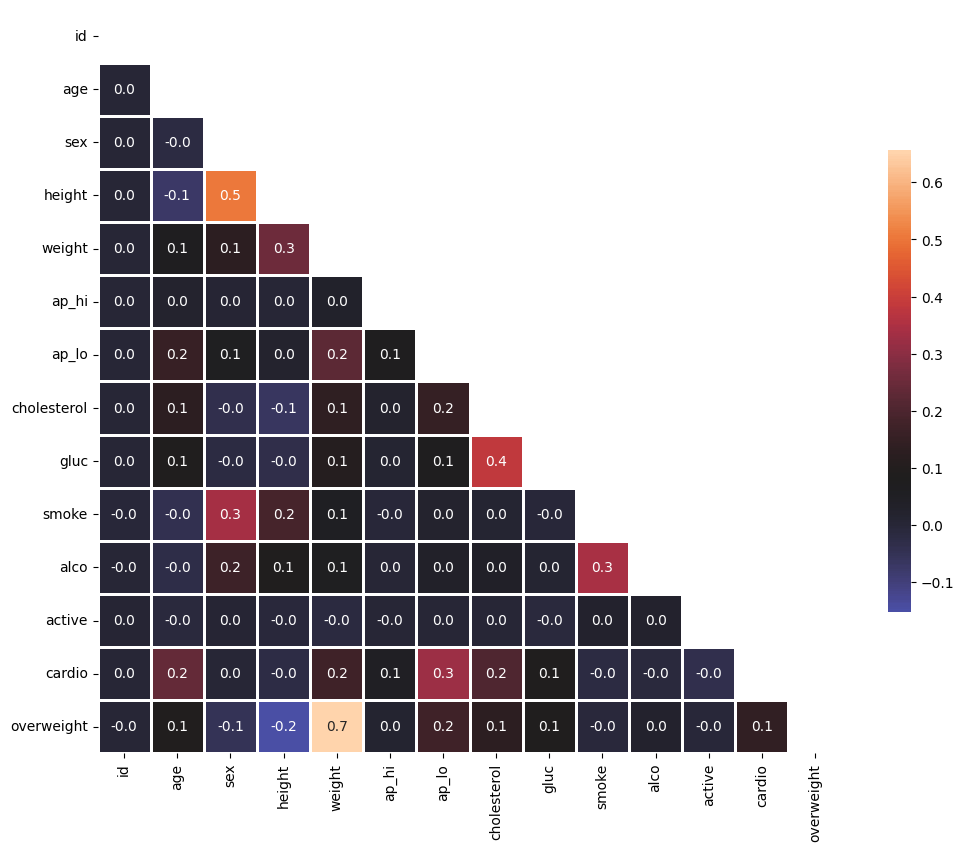

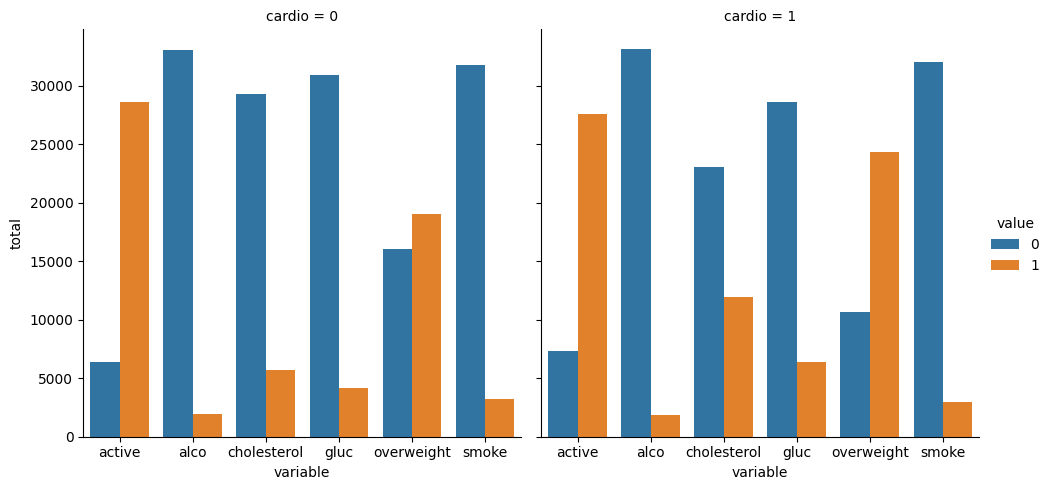

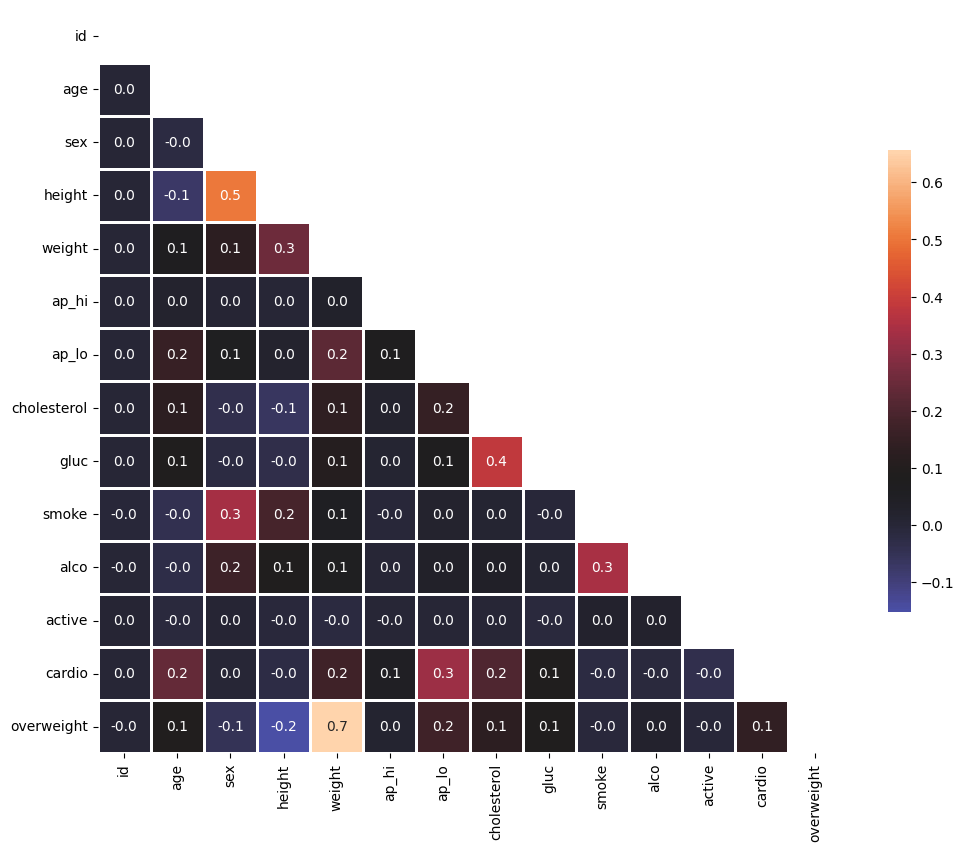

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1
df = pd.read_csv('medical_examination.csv')

# 2
df['overweight'] = round(df['weight'] / (df['height']/100)**2, 1)
df['overweight'] = df['overweight'].apply(lambda x: 0 if x <= 25 else 1)


# 3
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)

# 4
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index = False).count()


def draw_cat_plot():
    # 5
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


    # 6
    df_cat['total'] = 1
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index = False).count()

    # 7
    fig = sns.catplot(x = 'variable', y = 'total',data = df_cat,  hue = 'value', kind = 'bar', col = 'cardio').fig

    # 8
    fig.savefig('catplot.png')
    return fig

draw_cat_plot()


# 9
def draw_heat_map():
    # 10
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))]

    # 11
    corr = df_heat.corr(method = 'pearson')

    # 12
    mask = np.triu(corr)



    # 13
    fig, ax = plt.subplots(figsize = (12, 12))


    # 14
    sns.heatmap(corr, linewidths = 1, annot = True,square = True, mask = mask, fmt = '.1f', center = 0.08, cbar_kws = {'shrink':0.5})

    # 15
    fig.savefig('heatmap.png')
    return fig


draw_heat_map()
